Iteration Number: 1, Error: 422.47740188480714, s: 0, i: 0
Iteration Number: 2, Error: 258.3706104364132, s: 1.236781346536487, i: 4.109912638207691
Iteration Number: 3, Error: 158.0829759196518, s: 2.199096002621843, i: 7.324135577616618
Iteration Number: 4, Error: 96.795294890977, s: 2.946877312560078, i: 9.838163863781096
Iteration Number: 5, Error: 59.34053403272157, s: 3.5269767865103647, i: 11.804821747978986
Iteration Number: 6, Error: 36.450108139921774, s: 3.976019482201955, i: 13.34357647052612
Iteration Number: 7, Error: 22.459977896672015, s: 4.322636140517617, i: 14.54781911821453
Iteration Number: 8, Error: 13.908844576419833, s: 4.58920811130657, i: 15.490556284000991
Iteration Number: 9, Error: 8.681505814478992, s: 4.793231413037994, i: 16.228859404229606
Iteration Number: 10, Error: 5.485359704100239, s: 4.948383058213207, i: 16.807342935965877
Iteration Number: 11, Error: 3.530496072818647, s: 5.065354631193782, i: 17.260883350177785
Iteration Number: 12, Error: 2.33

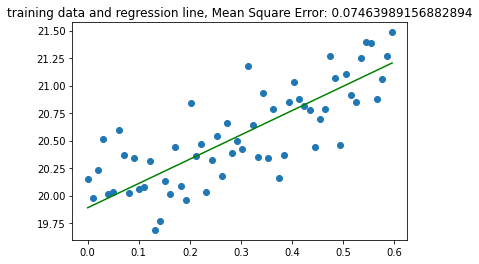

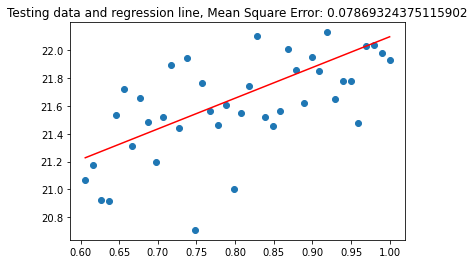

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
currentFigureNumber = 1

class RegressionModel:
    def __init__(self, iterations, learning_rate):
        self.iterations = iterations
        self.l_rate = learning_rate 
        self.s = 0 
        self.i = 0 
        self.error = float('inf') 
        
    def get_error(self, actual, predicted):
        mse = np.square(actual - predicted).mean()
        self.error = mse
        return mse
    
    def gradient_s(self, inputs, expected, predicted):
        return  (-2 / inputs.shape[0]) * sum(inputs * (expected - predicted))
    
    def gradient_i(self, expected, predicted):
        return (-2) * (expected - predicted).mean()
    
    def learn(self,x, y):
        for i in range(self.iterations):
            predicted = self.s * x + self.i
            current_mse = self.get_error(y, predicted)
            print(f"Iteration Number: {i + 1}, Error: {current_mse}, s: {self.s}, i: {self.i}")
            self.s -= self.l_rate * self.gradient_s(x, y, predicted)
            self.i -= self.l_rate * self.gradient_i(y, predicted)
            
    def predict_single(self, x):
        return self.s * x + self.i
    
    def predict(self, x):
        y = self.s * x + self.i
        return x, y
    
def read_csv(path):
    x = []
    y = []
    with open(path) as f:
        reader = csv.reader(f)
        next(reader)
        for row in reader:
            x.append(float(row[1]))
            y.append(float(row[2]))
    return np.array(x), np.array(y)

def main():
    x, y = read_csv("lab_1_train.csv")
    lr = RegressionModel(500, 0.1)
    lr.learn(x,y)
    
    min_training_feature = min(x)
    max_training_feature = max(x)
    
    f1 = plt.figure(1)
    plt.title(f"training data and regression line, Mean Square Error: " +  str(lr.error))
    plt.scatter(x,y)
    plt.plot([min_training_feature, max_training_feature],
             [lr.predict_single(min_training_feature), lr.predict_single(max_training_feature)], 'g')
    
    f2 = plt.figure(2)
    
    x,y = read_csv("lab_1_test.csv")
    test_prediction_x, test_prediction_y = lr.predict(x)
    test_mse = lr.get_error(y, test_prediction_y)
    
    plt.title(f"Testing data and regression line, Mean Square Error: " + str(lr.error))
    
    plt.scatter(x, y)
    pred_min_x = min(test_prediction_x)
    pred_max_x = max(test_prediction_x)
    
    plt.plot([pred_min_x, pred_max_x], [lr.predict_single(pred_min_x), lr.predict_single(pred_max_x)], 'r')

    
if __name__ == "__main__":
    main()